In [2]:
import pandas as pd
import csv
import sqlite3

<b>Task 1. Take some data

In [123]:
pvb_gen = pd.read_csv('Preverbs.csv', sep=',', encoding='utf-8')
pvb_list = pd.read_csv('Preverbs_list.csv', sep=',', encoding='utf-8')
pvb_gen.head()
pvb_list.head()

,Language,source,preverb,meaning,comments
0,Agul,magometov1970,NaN,spatial preverbs,NaN
1,Agul,magometov1970,č(-),in combination with spatial preverbs,NaN
2,Agul,magometov1970,q(-),repetitive,NaN
3,Agul,magometov1970,NaN,opposite meaning (противоположное значение),NaN
4,Agul,magometov1970,j-,down,NaN


<b> Task 2. Create 2 tables

First table

In [119]:
with open('Preverbs.csv', 'r', encoding='utf-8') as k:
    k= k.readlines()
    
# подключаемся к базе данных
conn = sqlite3.connect('example.db')

# создаем объект "курсор", которому будем передавать запросы
c = conn.cursor()

# создаем таблицу
c.execute("DROP TABLE IF EXISTS PreverbsGen")
c.execute("CREATE TABLE IF NOT EXISTS PreverbsGen (id, lang, branch, idiom, type, core, value, source, page, comment)")

for row in k:
    row = row.split(',')
    c.execute("INSERT INTO PreverbsGen VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9]))
    # сохраняем изменения
conn.commit()

for i in c.execute("delete FROM PreverbsGen where id = 'id'"):
    print(i)
for i in c.execute("select * FROM PreverbsGen"):
    print(i)
# отключаемся от БД
conn.close()

('1', 'Agul', 'Lezgic', 'Agul', 'idiom', 'yes', '12', 'magometov1970', '158-165', '3 slots\n')
('2', 'Agul', 'Lezgic', "Huppuq'", 'village', 'no', '12', 'maisakganenkov2016', '3585-3590', '2 slots\n')
('3', 'Akhvakh', 'Andic', 'Northern Akhvakh', 'idiom', 'yes', '0', '"magomedbekova1967', ' creissels2016"', '')
('4', 'Andi', 'Andic', 'Andi', 'idiom', 'yes', '0', 'cercvadze1965', '', '\n')
('5', 'Archi', 'Lezgic', 'Archib', 'village', 'yes', '0', '"kibrik1977', ' chumakina2016"', 'ch: 3600-3601')
('6', 'Armenian', 'Armenian', 'Modern Eastern Armenian', 'idiom', 'yes', '24', 'dum-tragut2009', '647-651', '\n')
('7', 'Avar', 'Avar', 'Standard Avar', 'idiom', 'yes', '0', '"gamzatov1983', ' alekseevetal2012"', '"236-242')
('8', 'Azerbaijani', 'Turkic', 'Standard Azerbaijani', 'idiom', 'yes', '0', 'sirəliyevsevortyan1971', '', '\n')
('9', 'Bagvalal', 'Andic', 'Kvanada', 'village', 'yes', '0', 'kibrik2001', '', '\n')
('10', 'Bats', 'Nakh', 'Bats', 'village', 'yes', '5', 'desheriev1953', '"81',

Second table

In [112]:
# подключаемся к базе данных
conn = sqlite3.connect('example.db')

# создаем объект "курсор", которому будем передавать запросы
c = conn.cursor()

with open('Preverbs_list.csv', 'r', encoding='utf-8') as f:
    f = f.readlines()

# создаем таблицу
c.execute("DROP TABLE IF EXISTS Preverbs")
c.execute("CREATE TABLE IF NOT EXISTS Preverbs (lang, source, preverb, meaning, comment)")

for row in f:
    row = row.split(',')
    c.execute("INSERT INTO Preverbs VALUES (?, ?, ?, ?, ?)", (row[0], row[1], row[2], row[3], row[4]))

# сохраняем изменения
conn.commit()

for i in c.execute("delete FROM Preverbs where source = 'source'"):
    print(i)
for i in c.execute("SELECT * FROM Preverbs"):
    print(i)

# отключаемся от БД
conn.close()

('Agul', 'magometov1970', '', 'spatial preverbs', '\n')
('Agul', 'magometov1970', 'č(-)', 'in combination with spatial preverbs', '\n')
('Agul', 'magometov1970', 'q(-)', 'repetitive', '\n')
('Agul', 'magometov1970', '', 'opposite meaning (противоположное значение)', '\n')
('Agul', 'magometov1970', 'j- ', 'down', '\n')
('Agul', 'magometov1970', 'ɣ(-)', 'up', '\n')
('Agul', 'maisak2016', 'ʔ-', 'IN ‘inside a container', '\n')
('Agul', 'maisak2016', 'ʕ- ', '"INTER ‘inside liquid or substance’', '"')
('Agul', 'maisak2016', 'h- ', 'ANTE ‘in front of a ground’', '\n')
('Agul', 'maisak2016', 'q- ', 'POST ‘behind a ground', '\n')
('Agul', 'maisak2016', 'f- ', 'APUD ‘near a ground’', '\n')
('Agul', 'maisak2016', 'al- ', 'SUPER ‘on the horizontal surface’', '\n')
('Agul', 'maisak2016', 'k-', 'SUB/CONT ‘below’/‘attached to a ground’.', '\n')
('Agul', 'maisak2016', '-č- || -ča- ', 'LAT (lative) ‘', '\n')
('Agul', 'maisak2016', '-atː', "ELAT (elative) 'motion from'", '\n')
('Agul', 'maisak2016', '-ʁ

So my data is presented in two tables.

In the table "PreverbsGen" I have geneological information about the languages under study and the sources and the value (number of preverbs).
In table "Preverbs" I give a list of preverbs with their semantics for each language under study that has them. 

Thus, if I want to find a particular preverb I will use Table 2 and Table 1 is more useful to look at the whole picture.

Unfortunately, Table 2 is not finished and is not perfect for parsing. For example, some preverbs and their meaning are written in Russian, and some in English. Also, the semantic labels (even when in English) are not normalized. So at this stage it is rather difficult to search what branches have prefix of repetitive or look for all the preverbs with ("down") semantics. But when the data is more ready, all these queries can help make some interesrting typological generalizations.

<b> Task 3. Queries
    

1. We can check what languages don't have preverbs

In [122]:
# подключаемся к базе данных
conn = sqlite3.connect('example.db')

# создаем объект "курсор", которому будем передавать запросы
c = conn.cursor()

# создаем таблицу
c.execute("DROP TABLE IF EXISTS PreverbsGen")
c.execute("CREATE TABLE IF NOT EXISTS PreverbsGen (id, lang, branch, idiom, type, core, value, source, page, comment)")

for row in k:
    row = row.split(',')
    c.execute("INSERT INTO PreverbsGen VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9]))
    # сохраняем изменения
conn.commit()

for i in c.execute("delete FROM PreverbsGen where id = 'id'"):
    print(i)
for i in c.execute('SELECT lang, branch FROM PreverbsGen WHERE value = "0" order by branch'):
    print(i)


('Akhvakh', 'Andic')
('Andi', 'Andic')
('Bagvalal', 'Andic')
('Botlikh', 'Andic')
('Chamalal', 'Andic')
('Godoberi', 'Andic')
('Karata', 'Andic')
('Tindi', 'Andic')
('Avar', 'Avar')
('Lak', 'Lak')
('Archi', 'Lezgic')
('Tsakhur', 'Lezgic')
('Udi', 'Lezgic')
('Bezhta', 'Tsezic')
('Hinuq', 'Tsezic')
('Hunzib', 'Tsezic')
('Khwarshi', 'Tsezic')
('Tsez', 'Tsezic')
('Azerbaijani', 'Turkic')
('Kumyk', 'Turkic')
('Nogai', 'Turkic')


2. Do all branches from the first query don't have languages with preverbs?

In [123]:
for i in c.execute('SELECT lang, branch, value FROM PreverbsGen WHERE branch = "Andic" or branch = "Avar" or branch = "Lak" or branch = "Lezgic" or branch = "Tsezic" or branch = "Turkic" order by branch'):
    print(i)

('Akhvakh', 'Andic', '0')
('Andi', 'Andic', '0')
('Bagvalal', 'Andic', '0')
('Botlikh', 'Andic', '0')
('Chamalal', 'Andic', '0')
('Godoberi', 'Andic', '0')
('Karata', 'Andic', '0')
('Tindi', 'Andic', '0')
('Avar', 'Avar', '0')
('Lak', 'Lak', '0')
('Agul', 'Lezgic', '12')
('Agul', 'Lezgic', '12')
('Archi', 'Lezgic', '0')
('Budukh', 'Lezgic', '17')
('Kryz', 'Lezgic', '15')
('Lezgian', 'Lezgic', '22')
('Rutul', 'Lezgic', '14')
('Tabasaran', 'Lezgic', '7')
('Tsakhur', 'Lezgic', '0')
('Udi', 'Lezgic', '0')
('Bezhta', 'Tsezic', '0')
('Hinuq', 'Tsezic', '0')
('Hunzib', 'Tsezic', '0')
('Khwarshi', 'Tsezic', '0')
('Tsez', 'Tsezic', '0')
('Azerbaijani', 'Turkic', '0')
('Kumyk', 'Turkic', '0')
('Nogai', 'Turkic', '0')


so most Lezgic languages actually do have preverbs, but no Andic, Avar, Lak, Tsezic or Turkic

3. I wonder are top five languages with the most number of preverbs

In [142]:
for i in c.execute('SELECT id, lang, branch, value FROM PreverbsGen order by value desc limit 5'):
    print(i)



('15', 'Chechen', 'Nakh', '9')
('33', 'Tabasaran', 'Lezgic', '7')
('10', 'Bats', 'Nakh', '5')
('17', 'Dargwa', 'Dargwa', '5')
('6', 'Armenian', 'Armenian', '24')


oh, actually I cannot do it nicely using SQLite3 :( I checked that I cannot alter columns useing it....:
but I can do this

In [143]:
for i in c.execute('SELECT id, lang, branch, value FROM PreverbsGen order by value desc limit 5 offset 4'):
    print(i)

('6', 'Armenian', 'Armenian', '24')
('30', 'Lezgian', 'Lezgic', '22')
('23', 'Ingush', 'Nakh', '21')
('16', 'Dargwa', 'Dargwa', '18')
('13', 'Budukh', 'Lezgic', '17')


4. now I want to look at all Lizgic preverbs

In [180]:
# создаем таблицу
c.execute("DROP TABLE IF EXISTS Preverbs")
c.execute("CREATE TABLE IF NOT EXISTS Preverbs (language, source, preverb, meaning, comments)")

for row in f:
    row = row.split(',')
    c.execute("INSERT INTO Preverbs VALUES (?, ?, ?, ?, ?)", (row[0], row[1], row[2], row[3], row[4]))

# сохраняем изменения
conn.commit()

for i in c.execute("delete FROM Preverbs where source = 'source'"):
    print(i)
for i in c.execute('SELECT lang, preverb, meaning FROM PreverbsGen inner join Preverbs on PreverbsGen.lang = Preverbs.language where branch = "Lezgic"'):
    print(i)

('Agul', '', 'opposite meaning (противоположное значение)')
('Agul', '', 'spatial preverbs')
('Agul', '-a- || -da- ', 'DOWN ‘motion down’.')
('Agul', '-atː', "ELAT (elative) 'motion from'")
('Agul', '-č- || -ča- ', 'LAT (lative) ‘')
('Agul', '-ʁ- || ʁa-', 'UP ‘motion up’')
('Agul', 'al- ', 'SUPER ‘on the horizontal surface’')
('Agul', 'f- ', 'APUD ‘near a ground’')
('Agul', 'h- ', 'ANTE ‘in front of a ground’')
('Agul', 'j- ', 'down')
('Agul', 'k-', 'SUB/CONT ‘below’/‘attached to a ground’.')
('Agul', 'q(-)', 'repetitive')
('Agul', 'q- ', 'POST ‘behind a ground')
('Agul', 'q- ', 'repetitive')
('Agul', 'č(-)', 'in combination with spatial preverbs')
('Agul', 'ɣ(-)', 'up')
('Agul', 'ʔ-', 'IN ‘inside a container')
('Agul', 'ʕ- ', '"INTER ‘inside liquid or substance’')
('Agul', '', 'opposite meaning (противоположное значение)')
('Agul', '', 'spatial preverbs')
('Agul', '-a- || -da- ', 'DOWN ‘motion down’.')
('Agul', '-atː', "ELAT (elative) 'motion from'")
('Agul', '-č- || -ča- ', 'LAT (lat

At the end it broke a bit because there were two sources apparantly and splited by comma. 

5. let's check what languages have repetitive prefix

In [171]:
for i in c.execute('''SELECT lang, branch, preverb, meaning FROM Preverbsgen inner join Preverbs on PreverbsGen.lang = Preverbs.language 
where meaning = "repetitive"'''):
    print(i)

('Agul', 'Lezgic', 'q(-)', 'repetitive')
('Agul', 'Lezgic', 'q(-)', 'repetitive')
('Agul', 'Lezgic', 'q- ', 'repetitive')
('Agul', 'Lezgic', 'q- ', 'repetitive')
('Lezgian', 'Lezgic', 'qh(i)', 'repetitive')
('Lezgian', 'Lezgic', 'x(U)', 'repetitive')


Interestingly, only lezgic languages have repetitive (if this meaning has only one label in my data)

6. Finally, let's check in what languages and branches highly idionatized preverbs are used and how many preverbs these languages have at all. I guess few.

In [184]:
for i in c.execute('''SELECT distinct meaning, lang, branch, value, preverb FROM Preverbsgen inner join Preverbs on PreverbsGen.lang = Preverbs.language 
where meaning = "highly idiomatized" order by value'''):
    print(i)

('highly idiomatized', 'Dargwa', 'Dargwa', '10', 'har-')
('highly idiomatized', 'Dargwa', 'Dargwa', '10', 'q’a-')
('highly idiomatized', 'Dargwa', 'Dargwa', '12', 'har-')
('highly idiomatized', 'Dargwa', 'Dargwa', '12', 'q’a-')
('highly idiomatized', 'Kryz', 'Lezgic', '15', 'ç’a-/ç’u-')
('highly idiomatized', 'Kryz', 'Lezgic', '15', 'tu- ; t’u- ')
('highly idiomatized', 'Kryz', 'Lezgic', '15', 'yi')
('highly idiomatized', 'Kryz', 'Lezgic', '15', 'i-')
('highly idiomatized', 'Dargwa', 'Dargwa', '18', 'har-')
('highly idiomatized', 'Dargwa', 'Dargwa', '18', 'q’a-')
('highly idiomatized', 'Dargwa', 'Dargwa', '5', 'har-')
('highly idiomatized', 'Dargwa', 'Dargwa', '5', 'q’a-')


my guess was wrong :)))))

In [6]:
# отключаемся от БД
conn.close()

<b> Task 4. Visualization

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
prbs = pd.read_csv('Preverbs.csv', sep=',').fillna('') 

Let's look at the number od preverbs in all languages

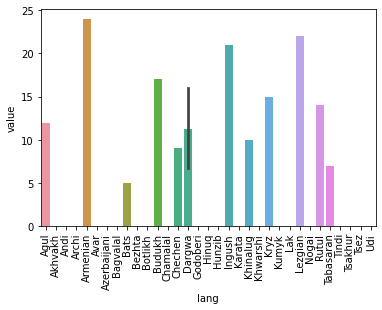

In [56]:
chart = sns.barplot(x = 'lang', y="value", data=prbs)
for item in chart.get_xticklabels():
    item.set_rotation(90)

Now look at the average number of preverbs in each group/family

<AxesSubplot:xlabel='group/family'>

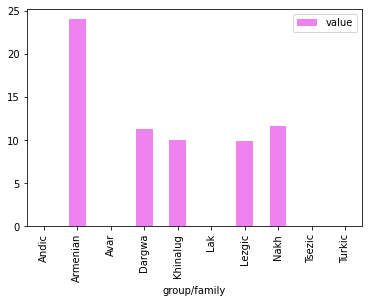

In [110]:
prbs.groupby("group/family").agg({"value": "mean"}).plot.bar(color = 'violet')

Now let's look only at Lezgic group. It's interesting how diverse Lezgic languages are regarding the number of preverbs. So the the average numbers from the previous plot do not show all the truth.

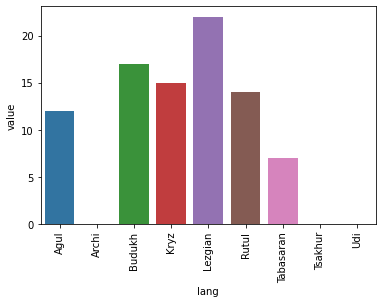

In [58]:
chart = sns.barplot(x = prbs[prbs['group/family'] == 'Lezgic']['lang'], y=prbs[prbs['group/family'] == 'Lezgic']['value'], data=prbs)
for item in chart.get_xticklabels():
    item.set_rotation(90)

Finally, the last plot presents the variety of numer of preverbs in each group/family under study. 
Unfortunately, I failed to write a code that could give names of languages to all the points but it still look rather nice, I think :)

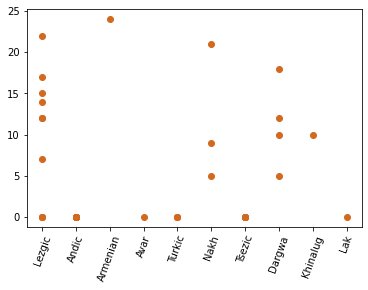

In [109]:
chart = plt.scatter(prbs['group/family'], prbs['value'], color='chocolate')
plt.xticks(rotation=70)
print(chart)

I also tried boxplot to visualize the same data but i think it looks worse. I don't have enough languages for this kind of plot.

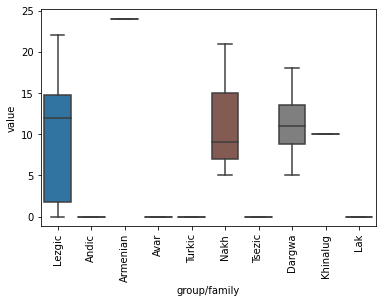

In [117]:
chart = sns.boxplot(x = 'group/family', y= 'value', data = prbs)
for item in chart.get_xticklabels():
    item.set_rotation(90)

The end